In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('diet_data_cleaned.csv')

# 假設 'ID' 是第一欄，後面是水果和蔬菜變數
features = data.drop(['ID'], axis=1)

# 標準化資料
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 降維處理
pca = PCA(n_components=0.95, random_state=42)
pca_data = pca.fit_transform(scaled_features)

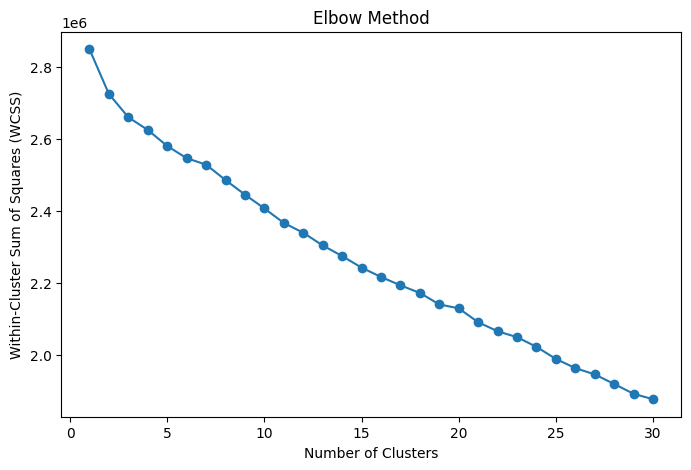

In [9]:
# 使用肘部法則(Elbow Method)確定最佳群集數量
wcss = []
for i in range(1, 31):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1, 31), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

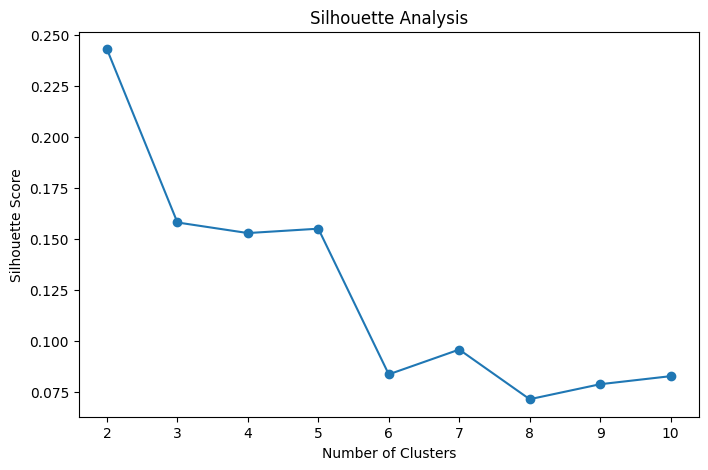

In [5]:
# 使用輪廓係數(Silhouette Score)確定最佳群集數量
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_data)
    score = silhouette_score(pca_data, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [10]:
# 根據肘部法則和輪廓係數選擇群集數量，例如5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_data)
labels = kmeans.labels_

# 將群集標籤加入原始資料
data['Cluster'] = labels

# 評估分群效果
sil_score = silhouette_score(pca_data, labels)
db_score = davies_bouldin_score(pca_data, labels)
print(f'輪廓係數: {sil_score}')
print(f'Davies-Bouldin 指數: {db_score}')

# 描述各群集
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

輪廓係數: 0.15502330432021255
Davies-Bouldin 指數: 3.4985325476728875
                   ID    Stewed     Prune     Dried     Mixed     Apple  \
Cluster                                                                   
0        3.457249e+06  0.064626  0.086978  0.193878  0.092809  0.493683   
1        3.514175e+06  0.006905  0.049768  0.114174  0.056286  0.445592   
2        3.511340e+06  1.072506  0.060341  0.139659  0.037956  0.458637   
3        3.505540e+06  0.009674  0.054049  0.161811  0.078515  0.518504   
4        3.506239e+06  0.003531  0.026989  0.082811  0.041597  0.369706   

           Banana     Berry    Cherry  Grapefruit  ...       Pea  Sweetpepper  \
Cluster                                            ...                          
0        0.581147  0.399417  0.073858    0.047133  ...  0.115160     0.279640   
1        0.499227  0.189185  0.027176    0.023696  ...  0.182197     0.051066   
2        0.472749  0.173236  0.025791    0.037226  ...  0.104501     0.105109   
3    

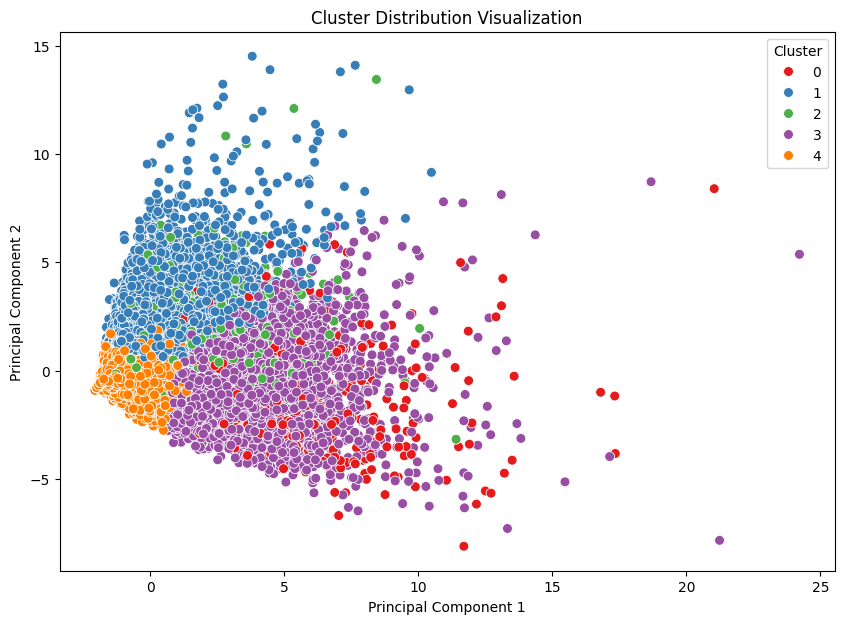

In [12]:

# 可視化群集分佈（以前兩個主成分為例）
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=labels, palette='Set1', s=50)
plt.title('Cluster Distribution Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [15]:
# 定義水果和蔬菜的變數名稱
fruit_columns = ['Stewed', 'Prune', 'Dried', 'Mixed', 'Apple', 'Banana', 'Berry', 'Cherry',
                'Grapefruit', 'Grape', 'Mango', 'Melon', 'Orange', 'Satsuma',
                'Peach_nectarine', 'Pear', 'Pineapple', 'Plum', 'Other']

vegetable_columns = ['Bakedbean', 'Pulses', 'Mixedvegetable', 'Vegetablepieces', 'Coleslaw',
                    'Sidesalad', 'Avocado', 'Broadbean', 'Greenbean', 'Beetroot', 'Broccoli',
                    'Butternutsquash', 'Cabbage_kale', 'Carrot', 'Cauliflower', 'Celery',
                    'Courgette', 'Cucumber', 'Garlic', 'Leek', 'Lettuce', 'Mushroom',
                    'Onion', 'Parsnip', 'Pea', 'Sweetpepper', 'Spinach', 'Sprouts',
                    'Sweetcorn', 'Freshtomato', 'Tinnedtomato', 'Turnip_swede',
                    'Watercress', 'Othervegetables']

In [16]:
# 分離水果和蔬菜資料
fruits = data[fruit_columns]
vegetables = data[vegetable_columns]

In [17]:
# 標準化
scaler_fruits = StandardScaler()
scaled_fruits = scaler_fruits.fit_transform(fruits)

scaler_vegetables = StandardScaler()
scaled_vegetables = scaler_vegetables.fit_transform(vegetables) * 0.5  # 給予蔬菜變數較低權重

# 降維
pca_fruits = PCA(n_components=0.95, random_state=42)
pca_fruits_data = pca_fruits.fit_transform(scaled_fruits)

pca_vegetables = PCA(n_components=0.95, random_state=42)
pca_vegetables_data = pca_vegetables.fit_transform(scaled_vegetables)

# 合併降維後的資料
combined_data = np.hstack((pca_fruits_data, pca_vegetables_data))

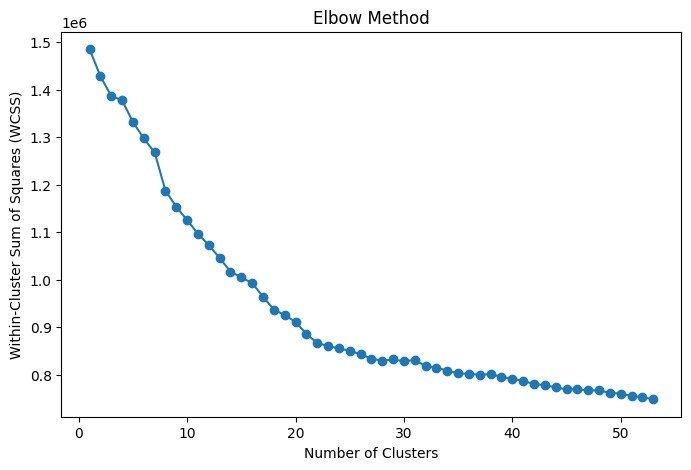

In [22]:
# 確定最佳群集數量（肘部法則）
wcss = []
for i in range(1, 54):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 54), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

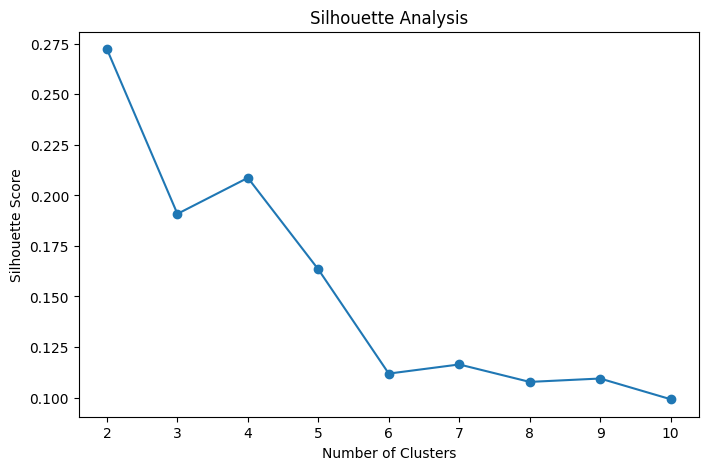

In [23]:
# 確定最佳群集數量（輪廓係數）
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(combined_data)
    score = silhouette_score(combined_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [ ]:
# 根據分析選擇群集數量，例如 k=4
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(combined_data)
labels = kmeans.labels_

# 將群集標籤加入原始資料
data['Cluster'] = labels

# 評估分群效果
sil_score = silhouette_score(combined_data, labels)
db_score = davies_bouldin_score(combined_data, labels)
ch_score = calinski_harabasz_score(combined_data, labels)
print(f'輪廓係數: {sil_score}')
print(f'Davies-Bouldin 指數: {db_score}')
print(f'Calinski-Harabasz 指數: {ch_score}')

輪廓係數: 0.2086879433268162
Davies-Bouldin 指數: 2.652116627505256
Calinski-Harabasz 指數: 1464.5270142250477


In [31]:
# 描述各群集
cluster_profiles = data.groupby('Cluster').mean()
print(cluster_profiles)

                   ID    Stewed     Prune     Dried     Mixed     Apple  \
Cluster                                                                   
0        3.471770e+06  0.038820  0.063665  0.130745  0.111180  0.399689   
1        3.354794e+06  0.078080  0.055771  0.093113  0.052861  0.448594   
2        3.511081e+06  0.065110  0.051751  0.139762  0.056466  0.445218   
3        3.510626e+06  0.042909  0.034675  0.100618  0.048032  0.407403   

           Banana     Berry    Cherry  Grapefruit  ...       Pea  Sweetpepper  \
Cluster                                            ...                          
0        0.571118  0.357143  0.082609    0.037267  ...  0.098913     0.143634   
1        0.481086  0.136760  0.008729    0.026188  ...  0.166343     0.080504   
2        0.562528  0.337113  0.150988    0.031432  ...  0.112315     0.142176   
3        0.478795  0.158917  0.017505    0.020575  ...  0.100918     0.090270   

          Spinach   Sprouts  Sweetcorn  Freshtomato  Tinnedtom

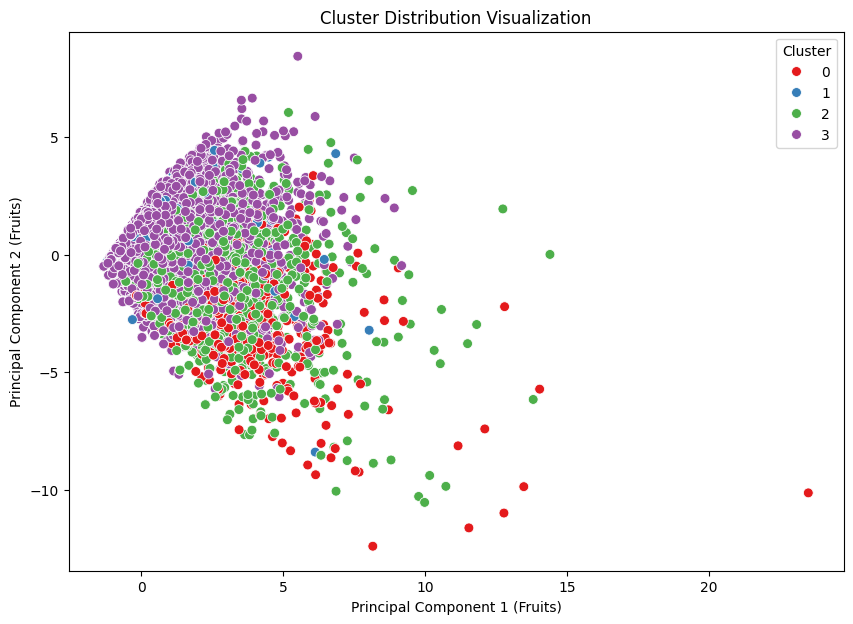

In [32]:
# 視覺化群集分佈（使用PCA的前兩個主成分）
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_fruits_data[:,0], y=pca_fruits_data[:,1], hue=labels, palette='Set1', s=50)
plt.title('Cluster Distribution Visualization')
plt.xlabel('Principal Component 1 (Fruits)')
plt.ylabel('Principal Component 2 (Fruits)')
plt.legend(title='Cluster')
plt.show()

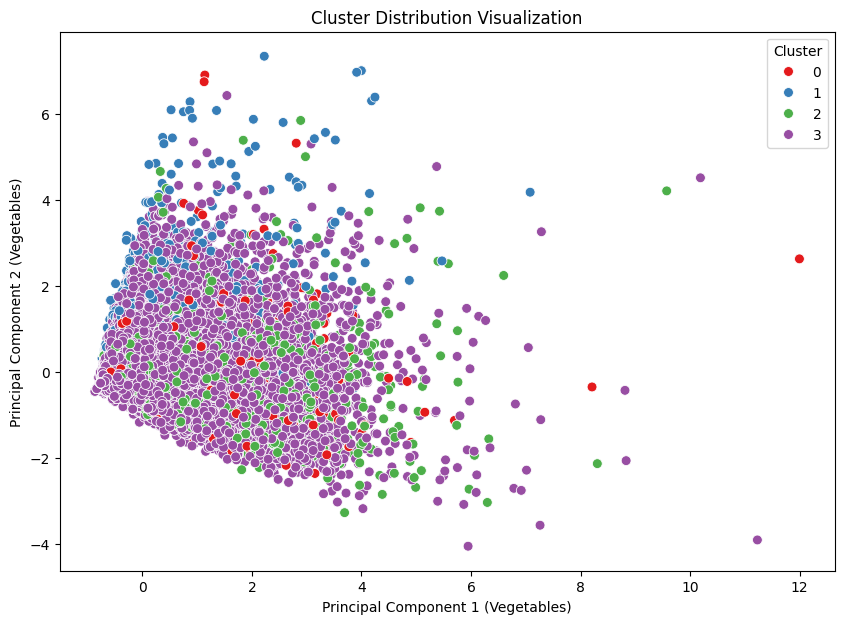

In [33]:
# 視覺化群集分佈（使用PCA的前兩個主成分）
plt.figure(figsize=(10,7))
sns.scatterplot(x=pca_vegetables_data[:,0], y=pca_vegetables_data[:,1], hue=labels, palette='Set1', s=50)
plt.title('Cluster Distribution Visualization')
plt.xlabel('Principal Component 1 (Vegetables)')
plt.ylabel('Principal Component 2 (Vegetables)')
plt.legend(title='Cluster')
plt.show()

In [1]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(combined_data)

# 然後使用K-Means在t-SNE結果上分群
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(tsne_data)

# 視覺化
plt.figure(figsize=(10,7))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=labels, palette='Set1', s=50)
plt.title('t-SNE Cluster Distribution Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

NameError: name 'combined_data' is not defined

In [34]:
fruits.head()

,Stewed,Prune,Dried,Mixed,Apple,Banana,Berry,Cherry,Grapefruit,Grape,Mango,Melon,Orange,Satsuma,Peach_nectarine,Pear,Pineapple,Plum,Other
0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


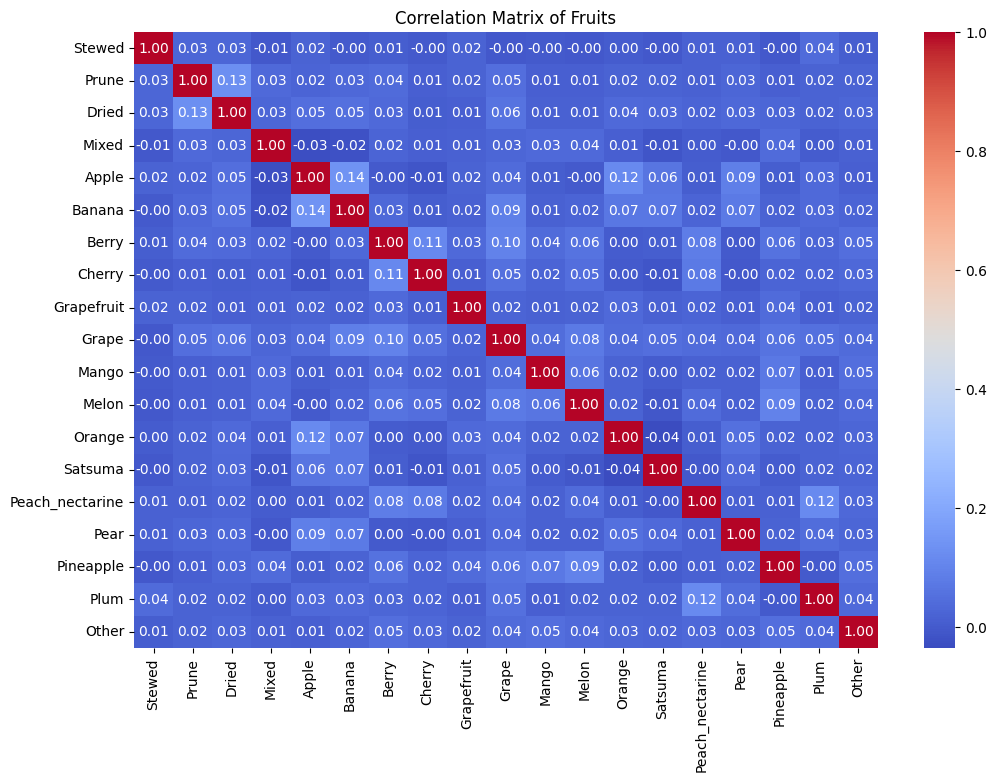

In [35]:
fruits_correlation_matrix = fruits.corr()

# 繪製熱圖
plt.figure(figsize=(12, 8))  # 可調整圖形大小
sns.heatmap(fruits_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Fruits")
plt.show()

In [49]:
# 篩選出相關性大於0.1的特徵組合，並排除自相關
high_correlation = fruits_correlation_matrix[(fruits_correlation_matrix > 0.1) & (fruits_correlation_matrix < 1)]

# 將結果轉換為長格式，並去除空值
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs.dropna(inplace=True)

# 排序並去除重複組合
high_correlation_pairs[['Feature 1', 'Feature 2']] = \
    pd.DataFrame(np.sort(high_correlation_pairs[['Feature 1', 'Feature 2']].values, axis=1))
high_correlation_pairs = high_correlation_pairs.drop_duplicates(subset=['Feature 1', 'Feature 2'])

# 顯示結果
print(high_correlation_pairs)

         Feature 1 Feature 2  Correlation
0            Dried     Prune     0.127255
2            Apple    Banana     0.140336
3            Apple    Orange     0.115626
5            Berry    Cherry     0.112927
8  Peach_nectarine      Plum     0.116478


相關係數低於 0.3，意味著這些水果的攝取量之間幾乎沒有顯著相關性。這種低相關性可能表示受試者對不同水果的選擇是相對獨立的。

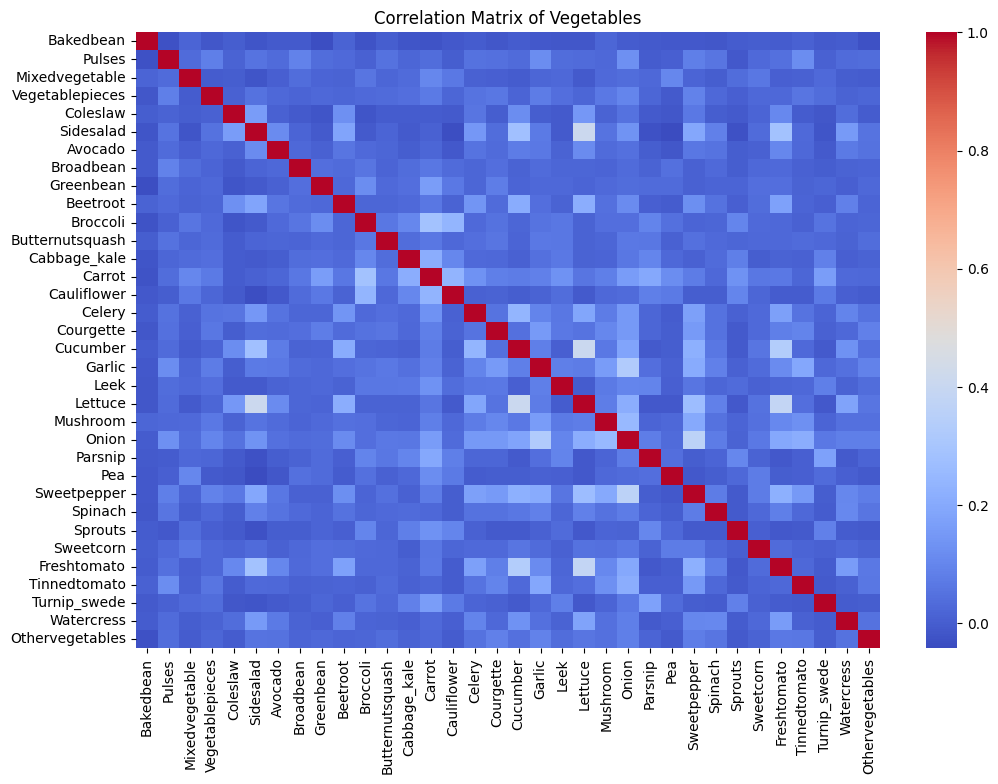

In [37]:
vegetables_correlation_matrix = vegetables.corr()

# 繪製熱圖
plt.figure(figsize=(12, 8))  # 可調整圖形大小
sns.heatmap(vegetables_correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Vegetables")
plt.show()

In [48]:
# 篩選出相關性大於0.4的特徵組合，並排除自相關
high_correlation = vegetables_correlation_matrix[(vegetables_correlation_matrix > 0.4) & (vegetables_correlation_matrix < 1)]

# 將結果轉換為長格式，並去除空值
high_correlation_pairs = high_correlation.stack().reset_index()
high_correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation_pairs.dropna(inplace=True)

# 排序並去除重複組合
high_correlation_pairs[['Feature 1', 'Feature 2']] = \
    pd.DataFrame(np.sort(high_correlation_pairs[['Feature 1', 'Feature 2']].values, axis=1))
high_correlation_pairs = high_correlation_pairs.drop_duplicates(subset=['Feature 1', 'Feature 2'])

# 顯示結果
print(high_correlation_pairs)

  Feature 1  Feature 2  Correlation
0   Lettuce  Sidesalad     0.412836
1  Cucumber    Lettuce     0.406412
